In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

## Load images dataset

In [2]:
from PIL import Image

DATASET_DIR = "../fashion_images/dataset_clean"

images = []
image_paths = []

# iterate to call images data
for root, _, files in os.walk(DATASET_DIR):
    for filename in files:
        if filename.lower().endswith(".jpg"):
            path = os.path.join(root, filename)
            image = Image.open(path).convert("RGB")
            images.append(image)
            image_paths.append(path)
    
print(f"Loaded {len(images)} JPG Images")

Loaded 8625 JPG Images


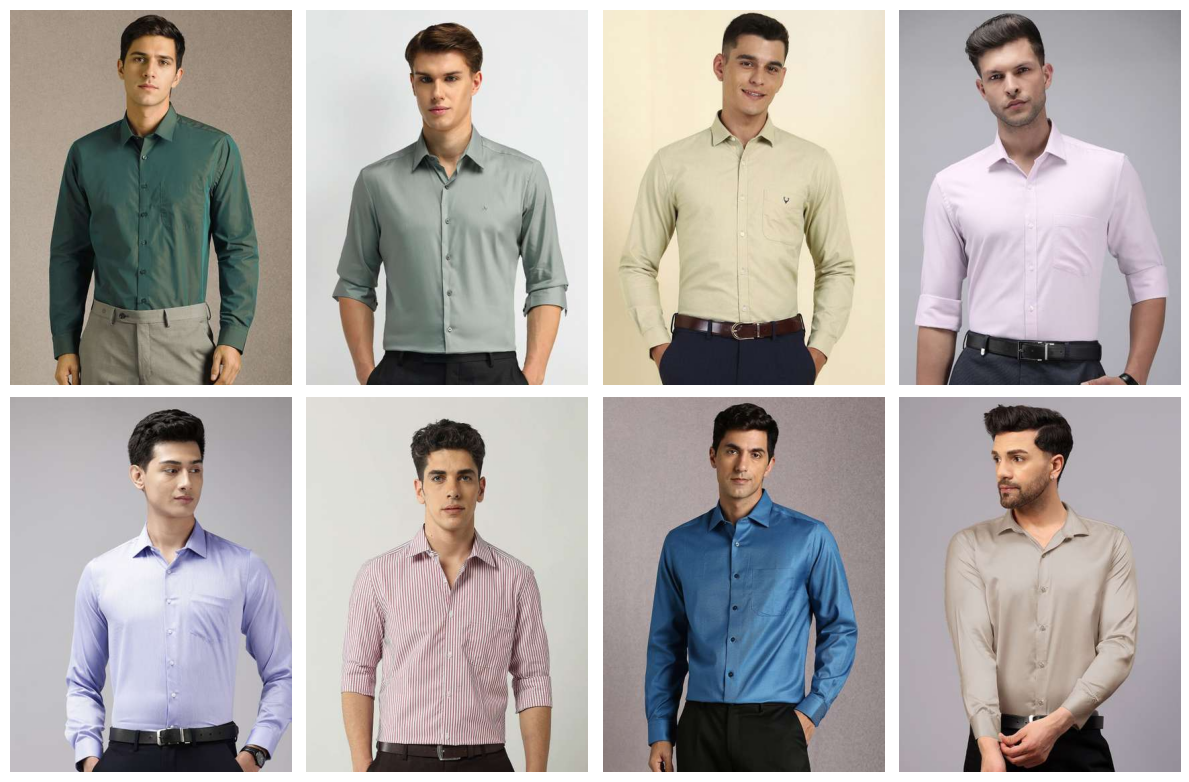

In [9]:
# show multiple images
import matplotlib.pyplot as plt

def show_images(images, cols=4, figsize=(12, 8)):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)

    for i, img in enumerate(images):
        plt.subplot(rows, cols,  i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Usage
show_images(images[:8], cols=4)

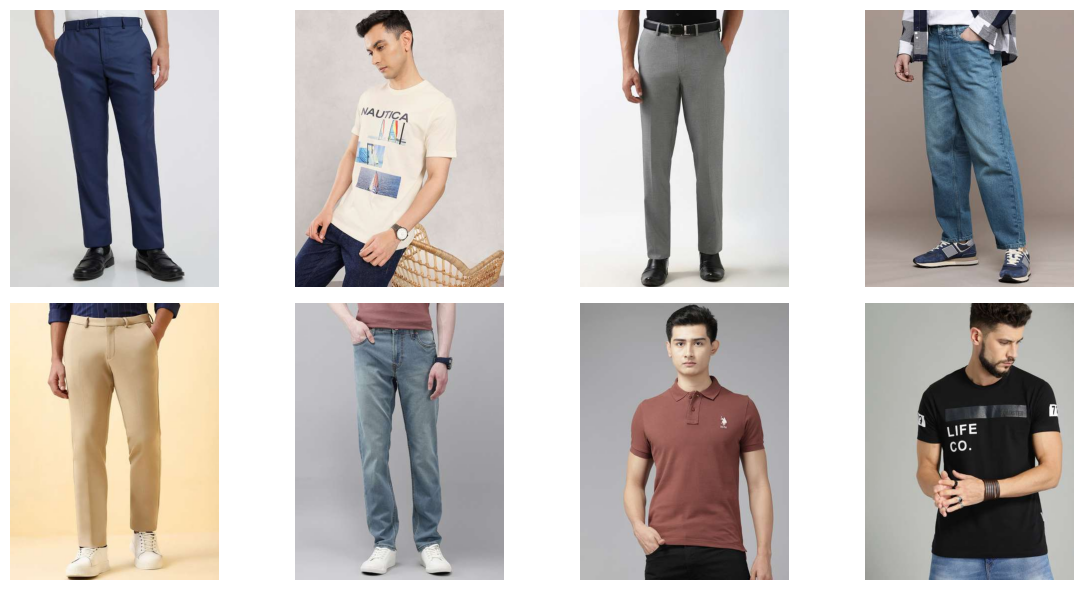

In [4]:
# Show random images

import random
import matplotlib.pyplot as plt

def show_random_images(images, n=8, cols=4, figsize=(12, 6)):
    n = min(n, len(images))
    selected = random.sample(images, n)

    rows = (n + cols - 1) // cols
    plt.figure(figsize=figsize)

    for i, img in enumerate(selected):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Usage
show_random_images(images, n=8)

## Load dataset from Spark

In [7]:
PARQUET_PATH = "hdfs/fashion_items_parquet"
df = pd.read_parquet(PARQUET_PATH)
df

,item_id,category,subcategory,sleeve_type,season,fabric,occasion,formality_level,size_range,brand,view_count,click_count,purchase_count,length_cm,price,stocks
0,TNC_000003,tops,printed_tshirts,short,summer,polyester,casual,low,L,Nike,2411,787,42,65,157055,146
1,TNC_000004,tops,formal_shirts,long,summer,denim,party,low,M,ZARA,1219,10,21,68,282021,115
2,TNC_000006,tops,formal_shirts,long,summer,cotton,casual,medium,S,Nike,1209,21,27,71,315906,0
3,TNC_000007,tops,solid_tshirts,short,all-season,fleece,casual,high,XS,Tommy Hilfiger,257,146,8,73,105185,151
4,TNC_000008,tops,casual_shirts,long,winter,linen,office,medium,S,Polo,401,322,23,78,209024,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550270,TNC_1099992,tops,printed_tshirts,short,all-season,polyester,casual,low,M,Polo,55,9,17,70,160868,95
550271,TNC_1099993,tops,formal_shirts,long,summer,linen,office,low,L,Polo,136,261,6,73,302436,196
550272,TNC_1099995,tops,casual_shirts,long,winter,fleece,casual,medium,XL,HnM,512,328,21,78,276939,100
550273,TNC_1099996,tops,printed_tshirts,short,summer,cotton,office,low,M,HnM,165,242,5,72,122545,73


## RAG Finetuning LLM